### Importing libraries

In [190]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [191]:
#setting seed

torch.manual_seed(42)

In [192]:
#checking if there is gpu

'gpu' if torch.cuda.is_available() else 'cpu'

'cpu'

In [193]:
from sklearn.datasets import make_regression

In [194]:
# obtaining random samples of data for regression task

X, y = make_regression(n_samples = 5000, n_features = 15,noise = 0.15,shuffle = True, random_state =2023)

In [195]:
#checking row 1 in X
X[1]

array([-0.70171655,  0.46574104, -0.53588754,  1.52172843, -0.89767908,
       -0.50659648, -1.37692561,  0.51084632,  0.63954491,  0.14608361,
        0.89124753, -0.69377474, -1.47763631,  0.27661801,  0.22602139])

In [196]:
# checking target at row 1
y[1]

-133.59478890138257

In [197]:
# combining the features(X) and target(y) 

data = pd.concat([pd.DataFrame(X, columns = [f'feature_{i+1}' for i in range(X.shape[1])]), pd.Series(y, name = 'target')],axis=1)

In [198]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,target
0,-0.852877,-2.460330,0.111767,-1.255022,0.822070,0.555955,0.822053,-0.939854,-1.622870,-1.049502,1.116623,-1.566067,0.550240,0.299112,-0.344032,-146.254292
1,-0.701717,0.465741,-0.535888,1.521728,-0.897679,-0.506596,-1.376926,0.510846,0.639545,0.146084,0.891248,-0.693775,-1.477636,0.276618,0.226021,-133.594789
2,0.055668,-0.512437,-0.140442,-1.250186,-0.206536,-0.199821,-0.318102,-0.463995,1.104247,0.774113,-0.468534,0.868290,0.716947,0.014040,-0.916074,113.658044
3,2.246904,-0.656691,-1.350093,-0.542179,-0.467420,-0.228617,-0.079347,-0.889581,0.301199,-0.455119,0.091477,-0.426491,-0.214580,-1.288006,-0.592060,-115.267735
4,-2.327396,0.226996,-0.258848,1.020740,-0.398465,0.890614,-0.171492,0.433517,0.042585,0.695253,-0.572065,-1.117801,-0.935849,-0.350431,-1.198613,-162.619746


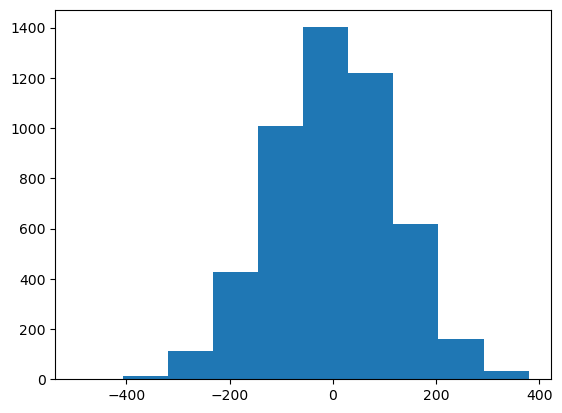

In [199]:
#histogram showing a normal distribution of the target variable
plt.hist(data['target']);

In [200]:
# converting the values to torch float32 dtype

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [201]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(4000, 1000, 4000, 1000)

In [202]:
#creating regression class

class regressor(nn.Module):
    def __init__(self,in_features,out_features,hidden_layer1,hidden_layer2,hidden_layer3):
        super().__init__()
        self.layer1 = nn.Linear(in_features,hidden_layer1)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_layer1,hidden_layer2)
        self.layer3 = nn.Linear(hidden_layer2,hidden_layer3)
        self.output = nn.Linear(hidden_layer3,out_features)
            
    def forward(self,X):
        X = self.layer1(X)
        X = self.relu(X)
        X = self.layer2(X)
        X = self.relu(X)
        X = self.layer3(X)
        X = self.relu(X)
        X = self.output(X)
        
        return X
            

In [203]:
# instantiating the model from regressor class
model = regressor(X.shape[1], 1, 15, 30 ,60)

In [204]:
BATCH_SIZE = 32 #batches of data
trainset = TensorDataset(X_train, y_train)  #pytorch dataformat
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)  #pytorch data loading format
validset = TensorDataset(X_train, y_train)#pytorch dataformat
validloader = DataLoader(validset, batch_size=BATCH_SIZE, shuffle=True)#pytorch data loading format

In [205]:
len(trainloader)

125

In [206]:
next(iter(trainloader))

[tensor([[-6.7980e-01, -3.8613e-01,  1.9994e+00, -4.9413e-01, -7.5154e-02,
          -1.4199e-01,  3.1660e-01, -7.1453e-01, -1.4014e+00,  8.4045e-01,
          -2.9610e-01, -7.7533e-01, -8.6954e-02,  3.8104e-01, -2.7030e-01],
         [ 1.0680e+00,  9.8764e-01,  1.1779e-01,  3.0650e-01,  2.8391e-01,
           1.7793e-01, -1.0681e+00, -2.3543e+00,  5.1729e-01, -1.1886e+00,
          -1.6190e+00,  1.3322e+00,  1.8333e+00,  5.4290e-01,  3.0558e-01],
         [-9.2561e-01,  2.2259e+00,  1.5196e+00, -2.8706e-01, -8.3609e-01,
           1.1137e+00,  3.0332e-01, -2.6732e-02,  1.4748e+00, -3.4462e-01,
           6.2033e-01, -9.6759e-01,  9.8644e-01,  5.6387e-01, -1.9326e+00],
         [-4.8452e-02,  1.0991e+00, -1.0327e-01, -1.5176e+00,  1.3642e-01,
           8.9187e-01, -1.7123e+00, -3.6481e-01,  6.5138e-01, -1.1591e+00,
          -1.9943e-02,  4.2107e-01,  7.4998e-02,  1.9237e-01,  2.1062e+00],
         [-5.8192e-01, -7.6985e-01, -3.9912e-01,  1.8641e-01, -1.8915e+00,
          -1.4754e+00

In [207]:
XX, yy = next(iter(trainloader))
print(f" Shape of feature data (X) in batch: {XX.shape}")
print(f"Shape of response data (y) in batch: {yy.shape}")

 Shape of feature data (X) in batch: torch.Size([32, 15])
Shape of response data (y) in batch: torch.Size([32])


In [208]:
LEARNING_RATE = 0.0001
MAE = nn.L1Loss()
criterion = nn.MSELoss()  # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE) 

In [209]:
def trainer(model, criterion, optimizer, trainloader, validloader, epochs=5, patience=3, verbose=True):
    """Simple training wrapper for PyTorch network."""
    
    train_loss = []
    valid_loss = []
    train_mae = []
    valid_mae = []
    for epoch in range(epochs):  # for each epoch
        train_batch_loss = 0
        train_batch_mae = 0
        valid_batch_loss = 0
        valid_batch_mae = 0
        
        # Training
        for X, y in trainloader:
            optimizer.zero_grad()       # Zero all the gradients w.r.t. parameters
            y_hat = model(X).squeeze() # Forward pass to get output
            loss = criterion(y_hat, y)   # Calculate loss based on output
            loss.backward()             # Calculate gradients w.r.t. parameters
            optimizer.step()            # Update parameters
            train_batch_loss += loss.item()  # Add loss for this batch to running total
            train_batch_mae += MAE(y_hat,y.type(torch.float32)).item()   # Average mae for this batch
        train_loss.append(train_batch_loss / len(trainloader))     # loss = total loss in epoch / number of batches = loss per batch
        train_mae.append(train_batch_mae / len(trainloader))  # mae
        
        # Validation
        model.eval()  # this turns off those random dropout layers, we don't want them for validation!
        with torch.no_grad():  # this stops pytorch doing computational graph stuff under-the-hood and saves memory and time
            for X, y in validloader:
                y_hat = model(X).squeeze() # Forward pass to get output
              
                loss = criterion(y_hat, y)   # Calculate loss based on output
                valid_batch_loss += loss.item()                  # Add loss for this batch to running total
                valid_batch_mae += MAE(y_hat,y.type(torch.float32)).item() # Average mae for this batch
        valid_loss.append(valid_batch_loss / len(validloader))
        valid_mae.append(valid_batch_mae / len(validloader))  # mae
        
        model.train()  # turn back on the dropout layers for the next training loop
        
        # Print progress
        if verbose:
            print(f"Epoch {epoch + 1}:",
                  f"Train Loss: {train_loss[-1]:.4f}.",
                  f"Valid Loss: {valid_loss[-1]:.4f}.",
                  f"Train mae: {train_mae[-1]:.4f}",
                  f"Valid mae: {valid_mae[-1]:.4f}")
        
        # Early stopping
        if epoch > 0 and valid_loss[-1] > valid_loss[-2]:
            consec_increases += 1
        else:
            consec_increases = 0
        if consec_increases == patience:
            print(f"Stopped early at epoch {epoch + 1} - val loss increased for {consec_increases} consecutive epochs!")
            break
    
    return train_loss,valid_loss,train_mae,valid_mae

In [210]:
trainloss,validloss,trainmae,validmae = trainer(model, criterion, optimizer, trainloader, validloader, epochs=30)

Epoch 1: Train Loss: 13940.9724. Valid Loss: 13916.7927. Train mae: 94.6380 Valid mae: 94.5544
Epoch 2: Train Loss: 9903.2171. Valid Loss: 288.3625. Train mae: 72.4912 Valid mae: 13.7814
Epoch 3: Train Loss: 163.7654. Valid Loss: 68.3658. Train mae: 10.0223 Valid mae: 6.7486
Epoch 4: Train Loss: 32.7274. Valid Loss: 14.8232. Train mae: 4.3082 Valid mae: 2.8327
Epoch 5: Train Loss: 11.3573. Valid Loss: 7.8823. Train mae: 2.4943 Valid mae: 2.0445
Epoch 6: Train Loss: 6.4343. Valid Loss: 5.0197. Train mae: 1.8792 Valid mae: 1.6899
Epoch 7: Train Loss: 4.2710. Valid Loss: 3.6973. Train mae: 1.5179 Valid mae: 1.4802
Epoch 8: Train Loss: 3.0154. Valid Loss: 2.4428. Train mae: 1.2899 Valid mae: 1.1645
Epoch 9: Train Loss: 2.3085. Valid Loss: 2.0074. Train mae: 1.1362 Valid mae: 1.0767
Epoch 10: Train Loss: 1.8002. Valid Loss: 1.7118. Train mae: 1.0039 Valid mae: 1.0093
Epoch 11: Train Loss: 1.4645. Valid Loss: 1.2050. Train mae: 0.9117 Valid mae: 0.8224
Epoch 12: Train Loss: 1.1978. Valid Los

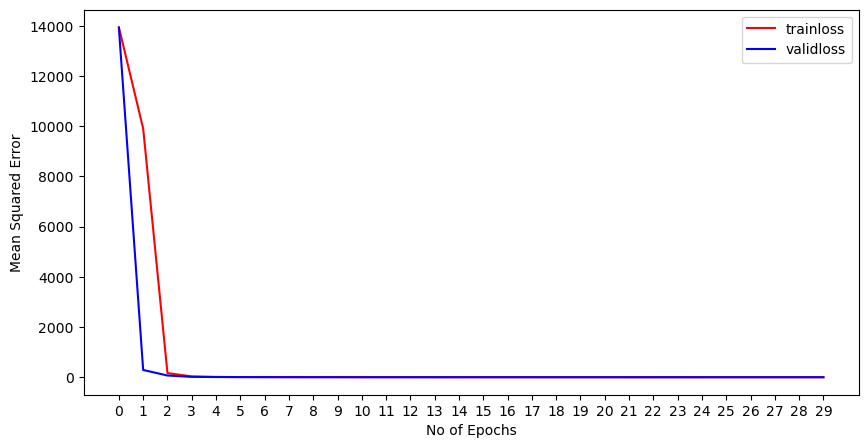

In [211]:
plt.figure(figsize = (10,5))
plt.plot(range(len(trainloss)), trainloss ,c='red',)
plt.plot(range(len(trainloss)),validloss ,c='blue')
plt.xticks(range(len(trainloss)))
plt.legend(['trainloss','validloss'])
plt.ylabel('Mean Squared Error')
plt.xlabel('No of Epochs')
plt.show()


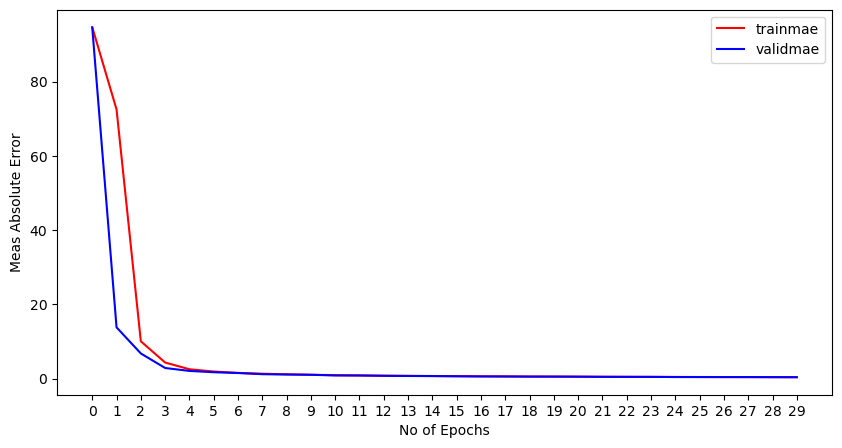

In [212]:
plt.figure(figsize = (10,5))
plt.plot(range(len(trainmae)), trainmae ,c='red',)
plt.plot(range(len(trainmae)),validmae ,c='blue')
plt.xticks(range(len(trainloss)))
plt.legend(['trainmae','validmae'])
plt.ylabel('Mean Absolute Error')
plt.xlabel('No of Epochs')
plt.show()


As seen in the two graphs above, the mean absolute error and mean squared error reduced drastically over a very large number of epochs